In [1]:
import BondGraphTools as bgt
model = bgt.new(name="Enzyme Catalyzed Reaction")

In [2]:
K_A=50
K_E=1
K_B=5

R=8.314
T=300

Ce_A = bgt.new("Ce", name="A", library="BioChem", value={'k':K_A , 'R':R, 'T':T})
Ce_B= bgt.new("Ce", name="B", library="BioChem", value={'k':K_B, 'R':R, 'T':T})
Ce_E= bgt.new("Ce", name="E", library="BioChem", value={'k':K_E, 'R':R, 'T':T})

reaction = bgt.new("Re", library="BioChem", value={'r':None, 'R':R, 'T':T})

zero_junction = bgt.new("0")
one_junction_1 = bgt.new("1")
one_junction_2 = bgt.new("1")

bgt.add(model, Ce_A, Ce_B, Ce_E, zero_junction, one_junction_1, one_junction_2, reaction)

In [3]:
bgt.connect(Ce_A,one_junction_1)
bgt.connect(one_junction_1,reaction)
bgt.connect(reaction,one_junction_2)
bgt.connect(one_junction_2,Ce_B)
bgt.connect(zero_junction,one_junction_1)
bgt.connect(zero_junction,Ce_E)
bgt.connect(one_junction_2,zero_junction)

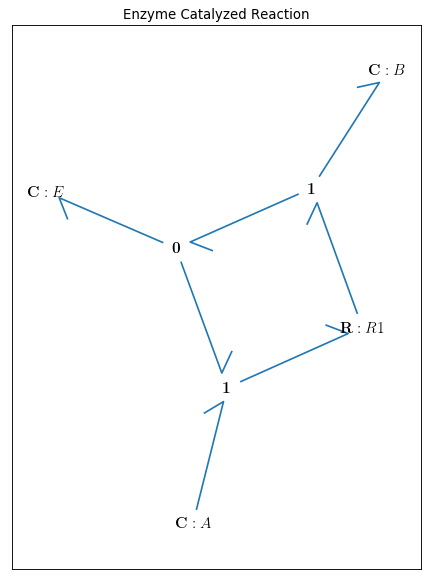

In [5]:
bgt.draw(model)

In [6]:
model.state_vars

{'x_0': (C: A, 'q_0'), 'x_1': (C: B, 'q_0'), 'x_2': (C: E, 'q_0')}

In [7]:
model.constitutive_relations

[dx_0 + 50*u_0*x_0*x_2 - 5*u_0*x_1*x_2,
 dx_1 - 50*u_0*x_0*x_2 + 5*u_0*x_1*x_2,
 dx_2]

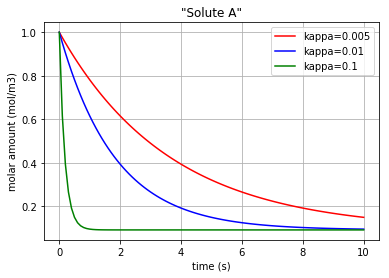

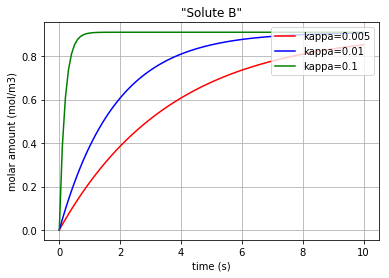

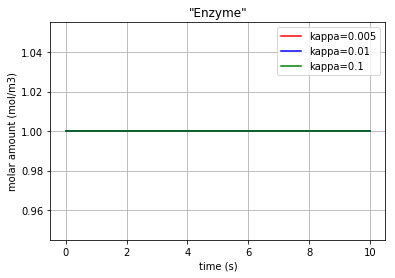

In [8]:
import matplotlib.pyplot as plt
x0 = {"x_0":1, "x_1":0.001, "x_2":1}
t_span = [0,10]

for c, kappa, label in [('r', 0.005, 'kappa=0.005'), ('b', 0.01, 'kappa=0.01'), ('g', 0.1,'kappa=0.1')]:
    t, x = bgt.simulate(model, x0=x0, timespan=t_span, control_vars={"u_0":kappa})
    plt.plot(t,x[:,0], c, label=label)
    plt.title('"Solute A"')
    plt.xlabel("time (s)")
    plt.ylabel("molar amount (mol/m3)")
    plt.legend(loc='upper right')
    plt.grid()
plt.show()


for c, kappa, label in [('r', 0.005, 'kappa=0.005'), ('b', 0.01, 'kappa=0.01'), ('g', 0.1,'kappa=0.1')]:
    t, x = bgt.simulate(model, x0=x0, timespan=t_span, control_vars={"u_0":kappa})
    plt.plot(t,x[:,1], c, label=label)
    plt.title('"Solute B"')
    plt.xlabel("time (s)")
    plt.ylabel("molar amount (mol/m3)")
    plt.legend(loc='upper right')
    plt.grid()
plt.show()

for c, kappa, label in [('r', 0.005, 'kappa=0.005'), ('b', 0.01, 'kappa=0.01'), ('g', 0.1,'kappa=0.1')]:
    t, x = bgt.simulate(model, x0=x0, timespan=t_span, control_vars={"u_0":kappa})
    plt.plot(t,x[:,2], c, label=label)
    plt.title('"Enzyme"')
    plt.xlabel("time (s)")
    plt.ylabel("molar amount (mol/m3)")
    plt.legend(loc='upper right')
    plt.grid()
plt.show()
    

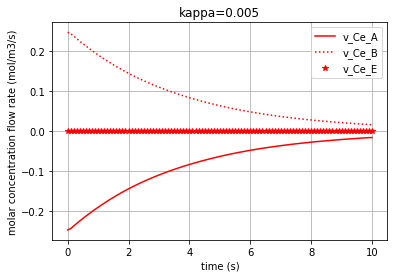

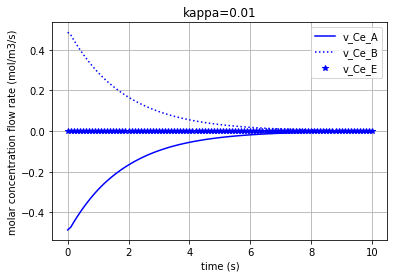

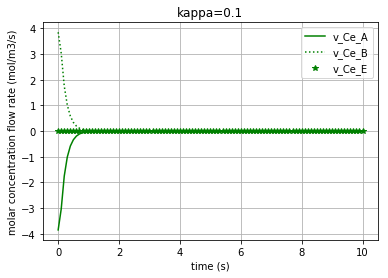

In [9]:
# Calculating the molar concentration flow rate of the solutes & the enzyme
#  dq_Ce_A/dt = v_Ce_A (flow in the Ce_A)
#  dq_Ce_B/dt = v_Ce_B (flow in the Ce_B)
#  dq_Ce_E/dt = v_Ce_E (flow in the Ce_E)

import matplotlib.pyplot as plt
import numpy as np
for c, kappa, title in [('r', 0.005, 'kappa=0.005'), ('b', 0.01, 'kappa=0.01'), ('g', 0.1,'kappa=0.1')]:
    t, x = bgt.simulate(model, x0=x0, timespan=t_span, control_vars={"u_0":kappa})
    f = np.array(x[:,0], dtype=float)
    v_Ce_A=np.gradient(f,0.1)
    
    f = np.array(x[:,1], dtype=float)
    slope=np.gradient(f,0.1)
    v_Ce_B=slope

    f = np.array(x[:,2], dtype=float)
    slope=np.gradient(f,0.1)
    v_Ce_E=slope
    
    plt.plot(t,v_Ce_A, c, label='v_Ce_A')       
    plt.plot(t,v_Ce_B, c+':', label='v_Ce_B')   
    plt.plot(t,v_Ce_E, c+'*', label='v_Ce_E')
    
    leg1=plt.legend(loc='upper right')
    plt.xlabel("time (s)")
    plt.ylabel("molar concentration flow rate (mol/m3/s)")
    plt.title(title)
    plt.grid()    
    plt.show()


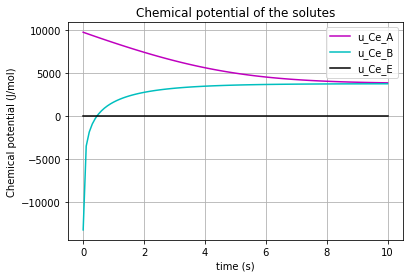

In [10]:
# Calculating & plotting the chemical potential for the solutes & enzyme (u_Ce_A & u_Ce_B & u_Ce_E )
# for kappa=0.01

kappa=0.01
t, x = bgt.simulate(model, x0=x0, timespan=t_span, control_vars={"u_0":kappa})

q_Ce_A = np.array(x[:,0], dtype=float)
u_Ce_A=R*T*np.log(K_A*q_Ce_A)

q_Ce_B = np.array(x[:,1], dtype=float)
u_Ce_B=R*T*np.log(K_B*q_Ce_B)

q_Ce_E = np.array(x[:,2], dtype=float)
u_Ce_E=R*T*np.log(K_E*q_Ce_E)

plt.plot(t,u_Ce_A, 'm', label='u_Ce_A')
plt.plot(t,u_Ce_B, 'c', label='u_Ce_B')
plt.plot(t,u_Ce_E, 'k', label='u_Ce_E')
plt.legend(loc='upper right')
plt.xlabel("time (s)")
plt.ylabel("Chemical potential (J/mol)")
plt.title('Chemical potential of the solutes')
plt.grid()   
 

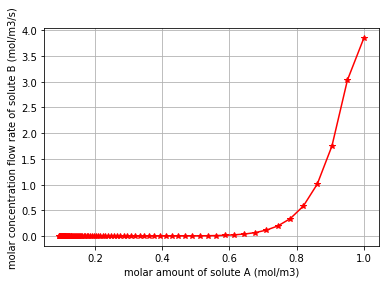

In [11]:
# Demonstrating the relation between the molar amount of the substrate "A" and 
# ...the molar flow rate of producing the product "B"
# Note that by the declining of the molar amount of the substrate "A", the production rate of "B" reduces.
plt.plot(q_Ce_A,v_Ce_B,'*-r')
plt.xlabel("molar amount of solute A (mol/m3)")
plt.ylabel("molar concentration flow rate of solute B (mol/m3/s)")
plt.grid() 